<a href="https://colab.research.google.com/github/KilledByBugs/CE888_labs/blob/main/LAB8_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget = "https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip"

--2021-03-12 13:24:40--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2021-03-12 13:24:40--  https://github.com/sagihaider/CE888_2021/raw/main/Lab_8/data.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip [following]
--2021-03-12 13:24:40--  https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_8/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20194537 (19M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  19.26M  --.-KB/s    in 0.1s

In [2]:
# Unzip training data
from zipfile import ZipFile
file_name = "/content/data.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


In [3]:
import os

for name in ["cats","dogs","Humans","horses"]:
  # Get all the paths
  data_dir_list = os.listdir('/content/data/'+ name)
  #print(data_dir_list)
  path, dirs, files = next(os.walk("/content/data/"+name))
  file_count = len(files)
  print(file_count)

202
202
202
202


In [4]:
# Make new base directory
original_dataset_dir = '/content/data' #GUANNAN: this will change later
base_dir = '/content/cats_dogs_humans_and_horses'
os.mkdir(base_dir)

In [5]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [6]:
import shutil

original_dataset_dir = '/content/data/cats'
fnames = ['cat.{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)
    
original_dataset_dir = '/content/data/dogs'
fnames = ['dog.{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/Humans'
fnames = ['rider-{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['rider-{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

original_dataset_dir = '/content/data/horses'
fnames = ['horse-{}.jpg'.format(i) for i in range(1, 67)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(68, 134)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['horse-{}.jpg'.format(i) for i in range(135, 203)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [8]:
def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'dog': return 1
    elif word_label == 'cat': return 0
    else : 
      word_label = img.split('-')[0]
      if word_label == 'horse': return 2
      elif word_label == 'rider': return 3   

In [9]:
def test_label_img(img):
    word_label = img.split('.')[0]
    #print(word_label)
    if word_label == 'dog': 
      print("DOG labeled")
      return 1
    elif word_label == 'cat': 
      print("CAT labeled")
      return 0
    else : 
      word_label = img.split('-')[0]
      if word_label == 'horse': 
        print("HORSE labeled")
        return 2
      elif word_label == 'rider': 
        print("HUMANS labeled")
        return 3   

In [10]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        # print(label)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [20]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [25]:
#print(train_X[0, :, :, 0])

[[0.654902   0.6509804  0.64705884 ... 0.42352945 0.43529415 0.43529415]
 [0.654902   0.6509804  0.64705884 ... 0.427451   0.43921572 0.43921572]
 [0.654902   0.6509804  0.64705884 ... 0.427451   0.43529415 0.43529415]
 ...
 [0.20392159 0.20000002 0.20392159 ... 0.16078432 0.15294118 0.16078432]
 [0.19607845 0.19607845 0.20392159 ... 0.14901961 0.14117648 0.14509805]
 [0.19215688 0.19215688 0.20392159 ... 0.12941177 0.13333334 0.14117648]]


In [12]:
test_label_img('dog.1.jpg')
test_label_img('cat.15.jpg')
test_label_img('horse-4.jpg')
test_label_img('rider-17.jpg')

DOG labeled
CAT labeled
HORSE labeled
HUMANS labeled


3

In [17]:
## Xception
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

In [ ]:
last_layer = model.get_layer('avg_pool').output
out = Dense(4, activation='softmax', name='output')(last_layer)  ## 4 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

In [40]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='Xception_model.h5', save_best_only=True),
]

In [42]:
history = model.fit(train_X, train_y,
                               batch_size=10,
                               epochs=10, 
                               validation_data=(val_X, val_y),
                               callbacks=my_callbacks)

Epoch 1/10
27/27 [==============================] - 38s 129ms/step - loss: 0.9979 - acc: 0.6275 - val_loss: 0.2560 - val_acc: 0.9432
Epoch 2/10
27/27 [==============================] - 2s 84ms/step - loss: 0.2892 - acc: 0.9230 - val_loss: 0.1877 - val_acc: 0.9621
Epoch 3/10
27/27 [==============================] - 2s 84ms/step - loss: 0.1602 - acc: 0.9558 - val_loss: 0.1352 - val_acc: 0.9659
Epoch 4/10
27/27 [==============================] - 2s 85ms/step - loss: 0.1050 - acc: 0.9667 - val_loss: 0.1148 - val_acc: 0.9697
Epoch 5/10
27/27 [==============================] - 2s 84ms/step - loss: 0.0697 - acc: 0.9888 - val_loss: 0.1188 - val_acc: 0.9697
Epoch 6/10
27/27 [==============================] - 2s 85ms/step - loss: 0.0603 - acc: 1.0000 - val_loss: 0.1044 - val_acc: 0.9697
Epoch 7/10
27/27 [==============================] - 2s 85ms/step - loss: 0.0481 - acc: 1.0000 - val_loss: 0.1042 - val_acc: 0.9659
Epoch 8/10
27/27 [==============================] - 2s 86ms/step - loss: 0.0351 -

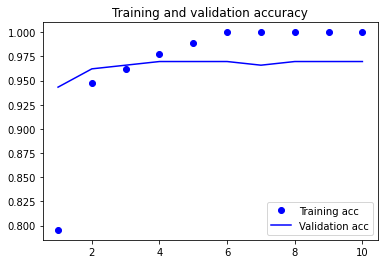

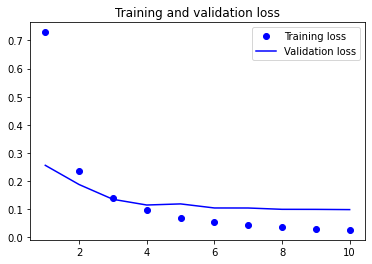

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [53]:
predictions

array([[9.9898735e-04, 4.4890813e-04, 8.8122970e-01, 1.1732236e-01],
       [1.2994029e-03, 1.9988057e-03, 2.9149191e-03, 9.9378693e-01],
       [9.9700159e-01, 2.7986930e-03, 3.1694086e-05, 1.6797282e-04],
       ...,
       [5.5356603e-04, 5.4156128e-04, 1.3835522e-04, 9.9876654e-01],
       [1.7086541e-02, 9.2048207e-03, 2.4124335e-03, 9.7129613e-01],
       [1.6583150e-02, 4.1332386e-02, 4.5512315e-02, 8.9657217e-01]],
      dtype=float32)

In [46]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred) #y_true，y_pred

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

ValueError: ignored